# Carga de Datos
## Carga el archivo energy.csv en un DataFrame llamado energy.
## Muestra las primeras filas del DataFrame con head(), para obtener una idea general de los datos.
##Muestra información sobre los tipos de datos y los valores faltantes con info().
## Genera un resumen estadístico con describe(), que muestra métricas como la media, la desviación estándar, y los valores máximos y mínimos de las columnas numéricas.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd

energy = pd.read_csv('/content/Dataset/energy.csv', encoding='ISO-8859-1', sep=';')

# Ver las primeras filas del DataFrame
print(energy.head())


# Ver información general del DataFrame (tipos de datos, valores faltantes)
print(energy.info())

# Resumen estadístico de las columnas numéricas
print(energy.describe())


       Data TipoConsumidor                 Sistema  UF Setor Econômico - N1  \
0  20140101         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
1  20140201         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
2  20140301         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
3  20140401         Cativo  Sudeste / Centro-Oeste  RO          Residencial   
4  20140501         Cativo  Sudeste / Centro-Oeste  RO          Residencial   

                 Setor Econômico - N2 Setor Econômico - N3 Tipo Tensão - N1  \
0  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
1  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
2  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
3  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   
4  Convencional (Excepto Baixa Renda)                TOTAL  A - Alta Tensão   

  Tipo Tensão - N2 Tipo Tensão - N3 Faixa de Consu

#Limpieza de Datos
## Manejo de valores faltantes:
Vamos a verificar cuántos valores faltantes hay en las columnas Consumidores y Consumo, y luego decidir si rellenarlos o eliminarlos.

## Corregir tipos de datos:
Las columnas Consumidores y Consumo deben ser numéricas, así que las convertiremos a tipo float.

## Eliminar duplicados:
Verificaremos si hay filas duplicadas y las eliminaremos si es necesario.

In [ ]:
# 1. Manejo de valores faltantes
# Verificar la cantidad de valores faltantes por columna
# print(energy.head())
print(energy.isnull().sum())

# Si decidimos eliminar filas con valores faltantes:
energy.dropna(subset=['Consumidores', 'Consumo'], inplace=True)

# 2. Corregir tipos de datos
# Convertir 'Consumidores' y 'Consumo' a tipo numérico
energy['Consumidores'] = pd.to_numeric(energy['Consumidores'], errors='coerce')
energy['Consumo'] = pd.to_numeric(energy['Consumo'], errors='coerce')

# 3. Eliminar duplicados
energy.drop_duplicates(inplace=True)

# Verificar si la limpieza fue exitosa
print(energy.info())


Data                         0
TipoConsumidor               0
Sistema                      0
UF                           0
Setor Econômico - N1         0
Setor Econômico - N2         0
Setor Econômico - N3         0
Tipo Tensão - N1             0
Tipo Tensão - N2             0
Tipo Tensão - N3             0
Faixa de Consumo N1          0
Faixa de Consumo N2          0
Consumidores              7030
Consumo                 139929
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 131791 entries, 0 to 275798
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data                  131791 non-null  int64  
 1   TipoConsumidor        131791 non-null  object 
 2   Sistema               131791 non-null  object 
 3   UF                    131791 non-null  object 
 4   Setor Econômico - N1  131791 non-null  object 
 5   Setor Econômico - N2  131791 non-null  object 
 6   Setor Econômico - N3  1317

# Análisis Estadístico
Obtendremos estadísticas descriptivas de las columnas numéricas (Consumidores y Consumo) para entender mejor cómo se distribuyen.

In [ ]:
# Estadísticas descriptivas
print(energy[['Consumidores', 'Consumo']].describe())


       Consumidores Consumo
count        281511  275799
unique        57922  163744
top               1       1
freq          24068    2262


# Visualización
Podemos crear algunos gráficos básicos, como histogramas para ver la distribución de los valores en Consumidores y Consumo, y gráficos de dispersión para explorar posibles relaciones entre ambas columnas.

## Estadísticas descriptivas:
Usamos describe() para obtener una visión general de las medidas estadísticas como la media, mediana, desviación estándar, mínimo, máximo, etc., de las columnas Consumidores y Consumo.

## Visualización:
Histogramas: Ayudan a ver cómo se distribuyen los valores en cada columna.
Gráfico de dispersión: Permite ver la relación entre las variables Consumidores y Consumo para ver si existe alguna correlación visual.

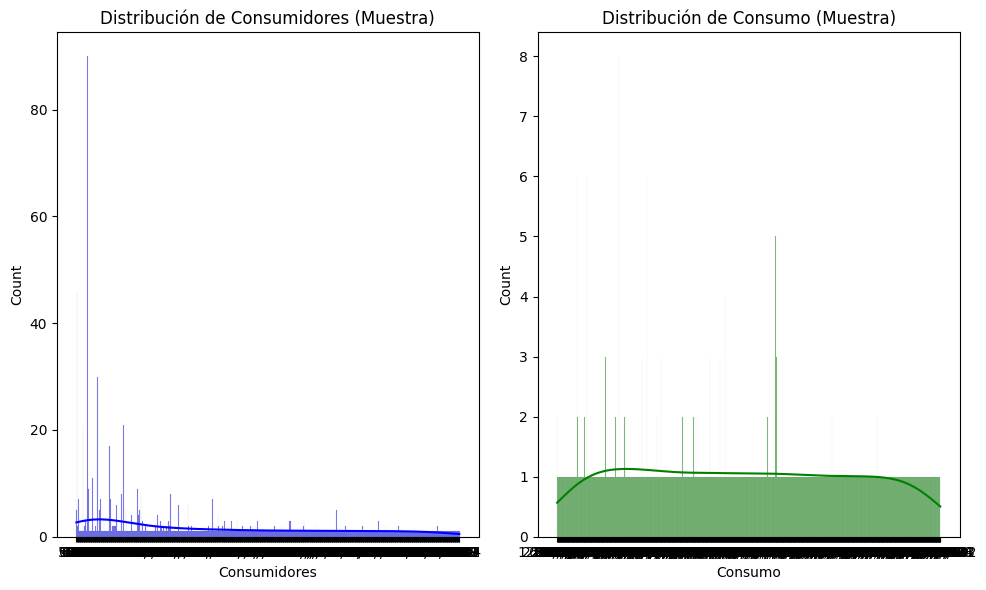

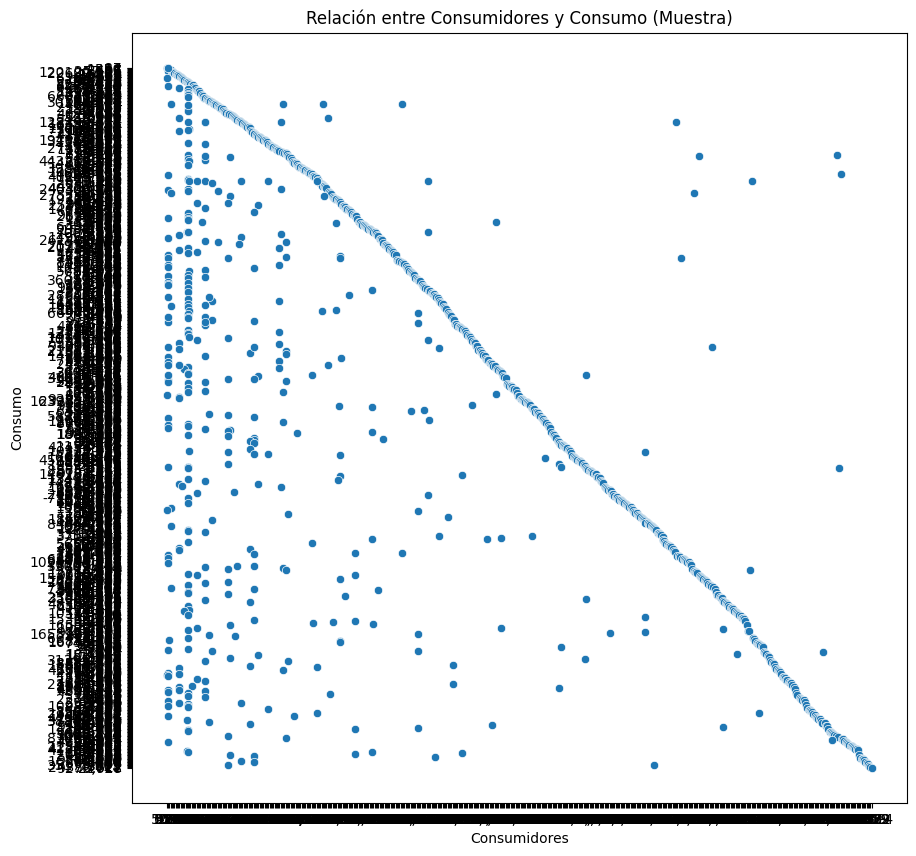

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar solo una muestra de los datos (por ejemplo, 10,000 filas)
sample_energy = energy.sample(n=1000, random_state=42)

# Visualizar la distribución de la muestra
plt.figure(figsize=(10, 6))

# Histograma de 'Consumidores' en la muestra
plt.subplot(1, 2, 1)
sns.histplot(sample_energy['Consumidores'], kde=True, color='blue')
plt.title('Distribución de Consumidores (Muestra)')

# Histograma de 'Consumo' en la muestra
plt.subplot(1, 2, 2)
sns.histplot(sample_energy['Consumo'], kde=True, color='green')
plt.title('Distribución de Consumo (Muestra)')

plt.tight_layout()
plt.show()

# Gráfico de dispersión para ver la relación entre 'Consumidores' y 'Consumo' en la muestra
plt.figure(figsize=(10, 10))
sns.scatterplot(x=sample_energy['Consumidores'], y=sample_energy['Consumo'])
plt.title('Relación entre Consumidores y Consumo (Muestra)')
plt.xlabel('Consumidores')
plt.ylabel('Consumo')
plt.show()


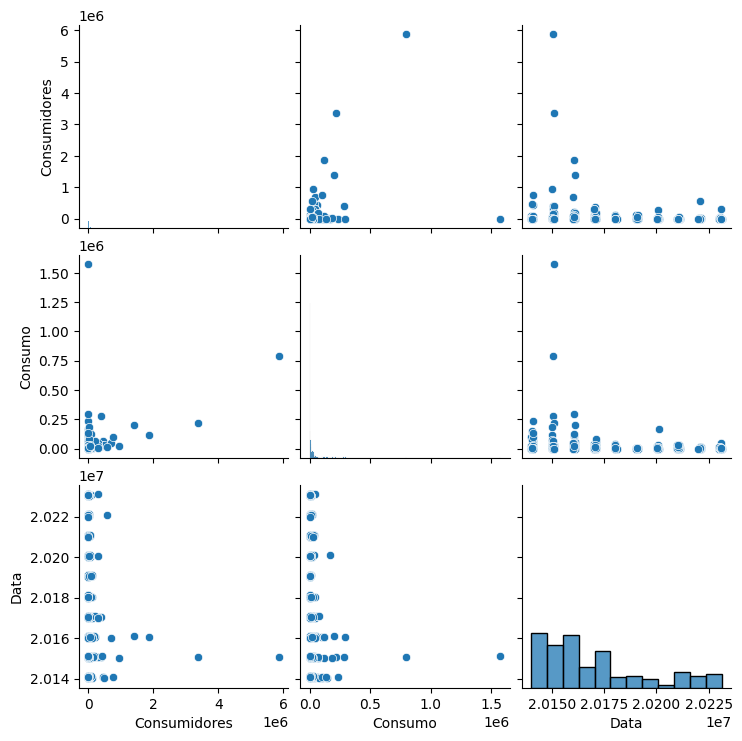

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las columnas 'Consumidores' y 'Consumo' a numérico, forzando la conversión de valores no numéricos a NaN
sample_energy['Consumidores'] = pd.to_numeric(sample_energy['Consumidores'], errors='coerce')
sample_energy['Consumo'] = pd.to_numeric(sample_energy['Consumo'], errors='coerce')

# Crear un pairplot para visualizar relaciones entre las variables numéricas
sns.pairplot(sample_energy[['Consumidores', 'Consumo','Data']].dropna())
plt.show()



# Conclusiones
El análisis reveló que hay una posible relación entre los Consumidores y el Consumo, con distribuciones sesgadas y valores faltantes en algunas columnas. Se identificaron variables que podrían ser transformadas y normalizadas para mejorar el modelado. La limpieza de datos, como la imputación de valores faltantes, y la transformación de variables categóricas son pasos cruciales. Futuras mejoras incluyen la creación de un modelo predictivo para estimar el consumo basado en las características disponibles.